Group distribution:
Group
Baseline    5
Vivarium    5
Flight      5
Ground      5
Name: count, dtype: int64

Summary statistics:
                   count      mean       std       min       25%       50%  \
Group    Cytokine                                                            
Baseline IFN-γ       5.0  0.025753  0.009479  0.016905  0.022237  0.022315   
         IL-10       5.0  0.333502  0.104556  0.188367  0.267575  0.364215   
         IL-12p70    5.0  2.504428  0.795416  1.671120  1.763445  2.555627   
         IL-2        5.0  0.185796  0.068623  0.104004  0.132862  0.190635   
         IL-5        5.0  0.184895  0.048418  0.139593  0.150725  0.180326   
         IL-6        5.0  1.993498  0.326579  1.526217  1.874698  1.986528   
         TNF-α       5.0  0.038553  0.011746  0.025161  0.026411  0.045634   
Flight   IFN-γ       5.0  0.034013  0.009697  0.027514  0.029410  0.030532   
         IL-10       5.0  0.384563  0.208452  0.124805  0.257419  0.371179   
         IL-1

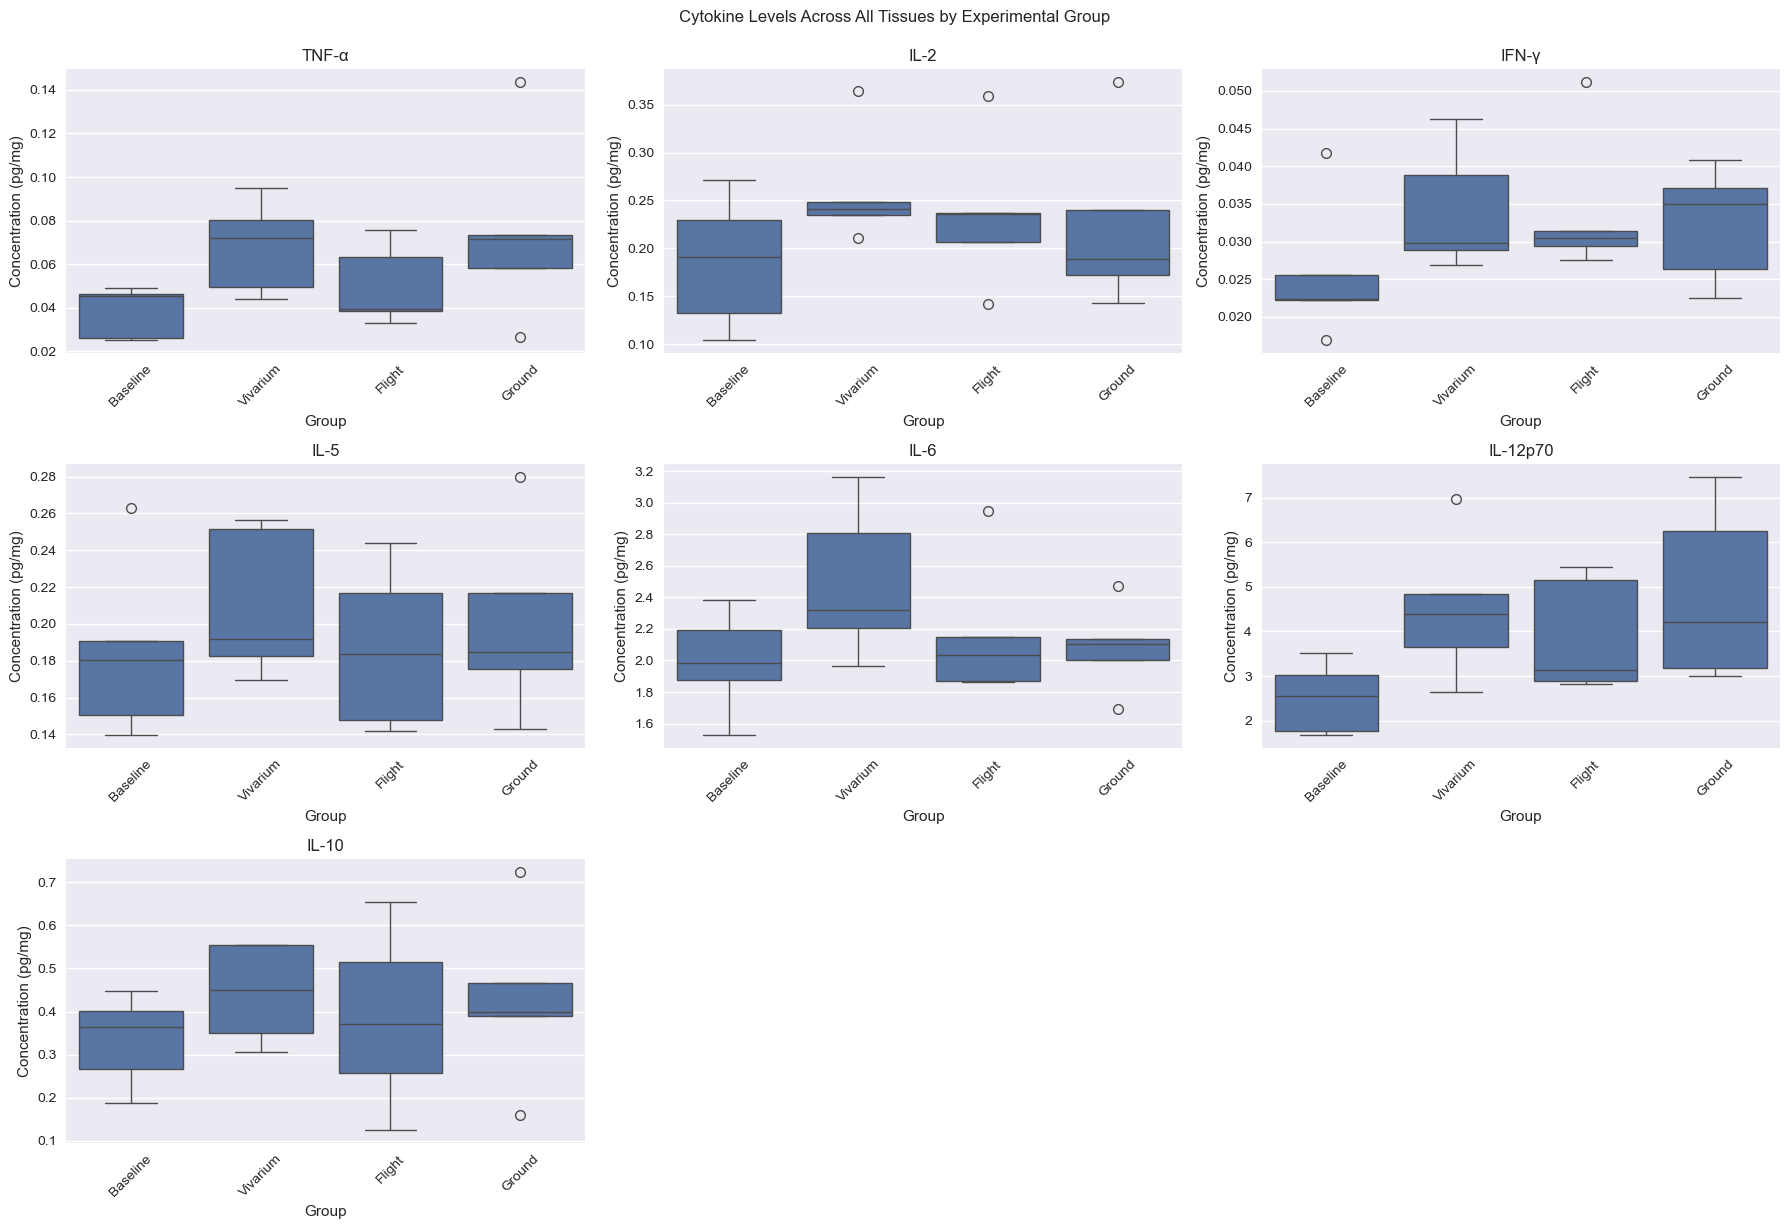

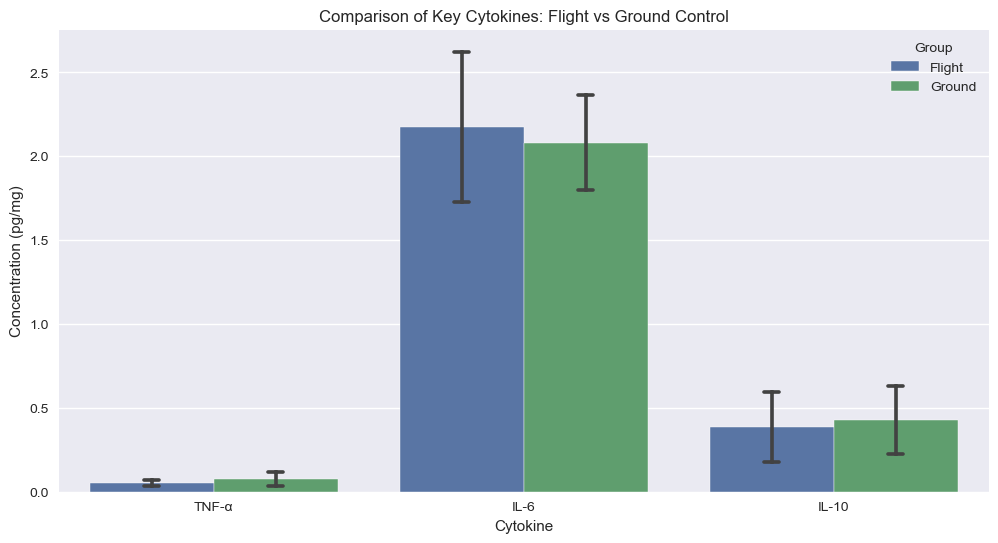

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8') 
df = pd.read_csv('LSDS-112_Immunoassay_Roy_ECLIA_AllTissues_SUBMITTED.csv')

df = df.dropna(how='all')

print("Group distribution:")
print(df['Group'].value_counts())

# Select cytokine columns and group
cytokine_columns = ['TNF-α', 'IL-2', 'IFN-γ', 'IL-5', 'IL-6', 'IL-12p70', 'IL-10']

cytokine_names = {
    'TNF-α': 'TNF-α',
    'IL-2': 'IL-2',
    'IFN-γ': 'IFN-γ',
    'IL-5': 'IL-5',
    'IL-6': 'IL-6',
    'IL-12p70': 'IL-12p70',
    'IL-10': 'IL-10'
}

melted_df = df.melt(id_vars=['Sample ID', 'Group'], 
                    value_vars=cytokine_columns,
                    var_name='Cytokine',
                    value_name='Concentration (pg/mg)')

# Summary statistics
summary_stats = melted_df.groupby(['Group', 'Cytokine'])['Concentration (pg/mg)'].describe()
print("\nSummary statistics:")
print(summary_stats)

plt.figure(figsize=(18, 12))

# Boxplots for each cytokine
for i, cytokine in enumerate(cytokine_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=melted_df[melted_df['Cytokine'] == cytokine],
                x='Group', y='Concentration (pg/mg)',
                order=['Baseline', 'Vivarium', 'Flight', 'Ground'])
    plt.title(cytokine)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.suptitle('Cytokine Levels Across All Tissues by Experimental Group', y=1.02)
plt.show()

# Bar plot comparing Flight vs Ground for key cytokines
key_cytokines = ['TNF-α', 'IL-6', 'IL-10']
flight_ground_df = melted_df[melted_df['Group'].isin(['Flight', 'Ground']) & 
                             melted_df['Cytokine'].isin(key_cytokines)]

plt.figure(figsize=(12, 6))
sns.barplot(data=flight_ground_df,
            x='Cytokine', y='Concentration (pg/mg)', 
            hue='Group', hue_order=['Flight', 'Ground'],
            errorbar='sd', capsize=0.1) 
plt.title('Comparison of Key Cytokines: Flight vs Ground Control')
plt.ylabel('Concentration (pg/mg)')
plt.xlabel('Cytokine')
plt.legend(title='Group')
plt.show()
